Проведем RFM - сегментацию.
Сегментация клиентов по трем признакам:
Recency - новизна (как давно пользователь совершал то или иное действие в системе?)
Frequence - как часто пользователь совершает покупки
Monetary - сколько прибыли принес конктерный пользователь для компании

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv(r'/Users/victoria/Desktop/for_clustering.csv',sep=';') 
df.head(5)

,Id_client,InWeek_amount,InWeek_SKU,Checkinmonth_average,Checkamount_mean,Count_transac,Total_amount,Total_SKU_qnt,Count_departments,Count_shop,...,Cat_babyprod_share,Communication_3month,Response_communcation,SKU_LastMonthqnt,Checks_LastMonthqnt,Amount_LastMonth,Discount,Discount_LastMonth,_SEGMENT_,EM_SEGMENT
0,5743,269.53,46,2,102.93,119,12399,1114.0,26,4,...,0.08,1,1,60,12,963.01,1,1,2,2
1,5756,359.99,36,4,100.28,130,12960,1024.0,29,3,...,0.04,1,0,91,15,1534.69,1,1,2,2
2,5781,329.32,9,4,102.20,29,2964,170.0,24,1,...,0.11,1,1,13,2,1514.48,1,1,3,3
3,5801,385.81,51,8,48.86,404,19676,2486.0,33,3,...,0.03,1,0,68,35,1872.24,1,1,2,2
4,5808,310.28,8,4,108.58,25,2482,255.0,26,2,...,0.04,1,1,22,3,557.97,1,1,1,1


Проверим все ли данные в таблице заполнены

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27508 entries, 0 to 27507
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id_client                 27508 non-null  int64  
 1   InWeek_amount             27508 non-null  float64
 2   InWeek_SKU                27508 non-null  int64  
 3   Checkinmonth_average      27508 non-null  int64  
 4   Checkamount_mean          27508 non-null  float64
 5   Count_transac             27508 non-null  int64  
 6   Total_amount              27508 non-null  int64  
 7   Total_SKU_qnt             27508 non-null  float64
 8   Count_departments         27508 non-null  int64  
 9   Count_shop                27508 non-null  int64  
 10  Count_city                27508 non-null  int64  
 11  Tenure                    27508 non-null  int64  
 12  SKU_meanbytransac         27508 non-null  float64
 13  Amount_last6mnth          27508 non-null  float64
 14  Check_

Переименуем колонки для наглядности

In [5]:
df.rename(columns = {'Days_pastvisit':'Recency', 'Count_transac':'Frequency', 'Total_amount':'Monetary'}, inplace = True)


Заменим нулевые значения Recency на 1. Это нужно для того, чтобы при нормализации таблицы с помощью логарифмирования все данные посчитались корректно. Так как напомню, нет такого логарифма с помощью которого можно получить 0. 

In [6]:
df.loc[(df.Recency == 0), 'Recency'] = 1

Создадим датафрейм, где отобразим только нужные нам колонки.

In [7]:
rfmt_data = df[['Id_client', 'Recency','Frequency','Monetary']]
rfmt_data



,Id_client,Recency,Frequency,Monetary
0,5743,3,119,12399
1,5756,2,130,12960
2,5781,8,29,2964
3,5801,1,404,19676
4,5808,8,25,2482
...,...,...,...,...
27503,822495,6,31,6165
27504,822844,8,21,3654
27505,823011,7,25,7509
27506,823218,8,33,8612


Построим график распределения частот для каждого признака

<AxesSubplot:xlabel='Monetary', ylabel='Count'>

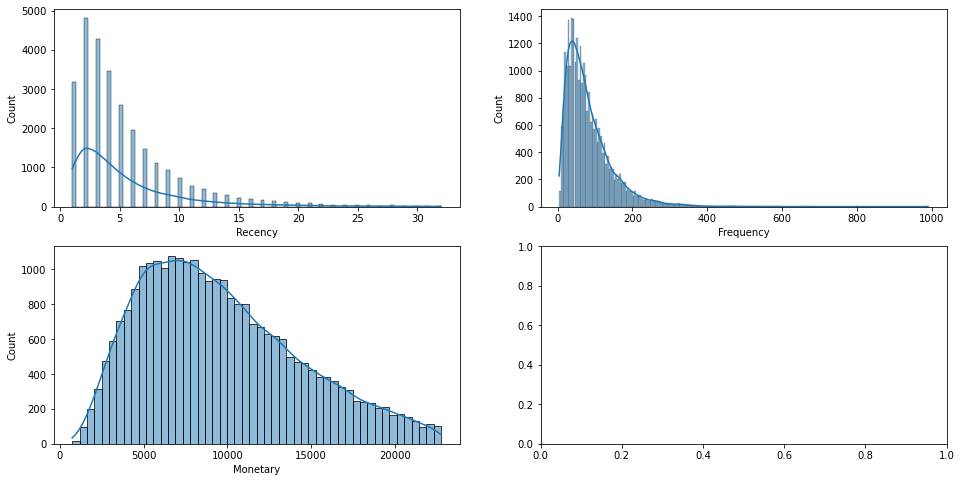

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))

# Recency distribution plot
sns.histplot(rfmt_data['Recency'], kde=True, ax=ax[0,0])

# Frequency distribution plot
sns.histplot(rfmt_data['Frequency'], kde=True, ax=ax[0,1])

# Monetary distribution plot
sns.histplot(rfmt_data['Monetary'], kde=True, ax=ax[1,0])



In [9]:
rfmt_data.describe()


,Id_client,Recency,Frequency,Monetary
count,27508.000000,27508.000000,27508.000000,27508.000000
mean,210314.227534,5.300167,82.467500,9595.764250
std,121828.905739,4.539965,63.241479,4715.289266
min,5743.000000,1.000000,4.000000,739.000000
25%,105405.500000,2.000000,39.000000,5897.000000
50%,211786.000000,4.000000,66.000000,8821.000000
75%,309746.250000,7.000000,108.000000,12631.250000
max,830188.000000,32.000000,990.000000,22748.000000


По графикам видно, что они имеют скошенность. Чтобы избежать этого, прологорфируем величины. 

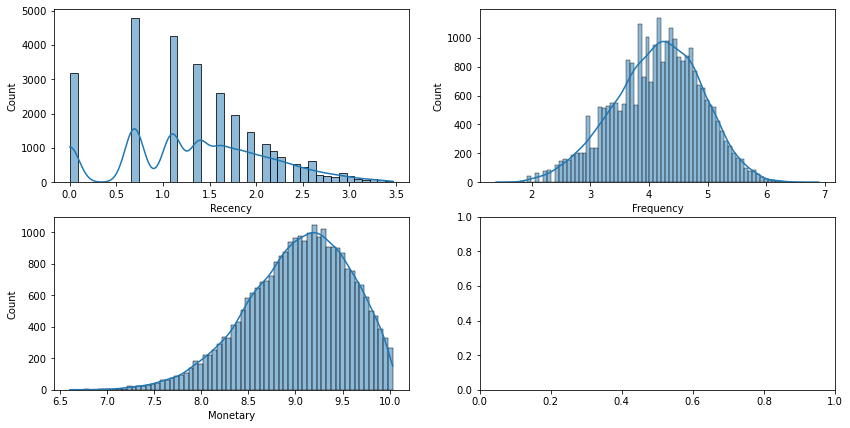

In [10]:
# apply log transformation
rfmt_data_log = np.log(rfmt_data)

# plot transform variables
fig, ax = plt.subplots(2, 2, figsize = (14, 7))
sns.histplot(rfmt_data_log['Recency'], kde = True, ax = ax[0, 0])
sns.histplot(rfmt_data_log['Frequency'], kde = True, ax = ax[0, 1])
sns.histplot(rfmt_data_log['Monetary'], kde = True, ax = ax[1, 0])
plt.show()

In [11]:
# check out if our data have the same mean and std
rfmt_data_log.describe().round(2)

,Id_client,Recency,Frequency,Monetary
count,27508.00,27508.00,27508.00,27508.00
mean,11.99,1.36,4.15,9.04
std,0.85,0.78,0.75,0.54
min,8.66,0.00,1.39,6.61
25%,11.57,0.69,3.66,8.68
50%,12.26,1.39,4.19,9.08
75%,12.64,1.95,4.68,9.44
max,13.63,3.47,6.90,10.03


Видим, что значения среднего и стандартного отклонения сильно различаются. Необходимо привести их к "одному измерению"

In [13]:
from sklearn.preprocessing import StandardScaler

# normalize our data with StandardScaler()
scaler = StandardScaler()
scaler.fit(rfmt_data_log)
rfmt_norm = scaler.transform(rfmt_data_log)

# create pandas DataFrame
rfmt_norm = pd.DataFrame(rfmt_norm, index = rfmt_data_log.index, columns = rfmt_data_log.columns)

# check if normalized data have the same mean and std
rfmt_norm.describe().round(2)

,Id_client,Recency,Frequency,Monetary
count,27508.00,27508.00,27508.00,27508.00
mean,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00
min,-3.91,-1.74,-3.69,-4.48
25%,-0.50,-0.86,-0.65,-0.65
50%,0.32,0.03,0.05,0.09
75%,0.76,0.74,0.71,0.75
max,1.92,2.68,3.67,1.84


Наши данные готовы к кластеризации. Для того, чтобы определить оптимальное количество кластеров воспользуемся меттодом Elbow.

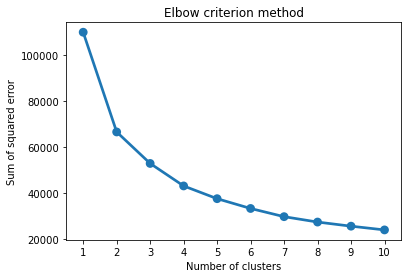

In [14]:


# calculate SSE for different number of clusters ranging from 1 to 10
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(rfmt_norm)
    sse[k] = kmeans.inertia_

# plot SSE for each 'k'
sns.pointplot(x = list(sse.keys()), y = list(sse.values()))
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared error')
plt.title('Elbow criterion method')
plt.show()

Видим изгиб при 2-х кластерах. Но на всякий случай проверим и значение 3.

In [15]:
# run K-means with 2 clusters on preprocessed data
kmeans = KMeans(n_clusters = 2, random_state = 1)
kmeans.fit(rfmt_norm)

# extract cluster labels
cluster_labels_2 = kmeans.labels_

# create a Cluster column in the original dataset
rfmt_data_k2 = rfmt_data.assign(Cluster = cluster_labels_2)

# calculate average RFMT values and sizes for each cluster 
rfmt_data_k2_grouped = rfmt_data_k2.groupby('Cluster').agg({
    'Recency':'mean', 'Frequency':'mean', 'Monetary':'mean'})

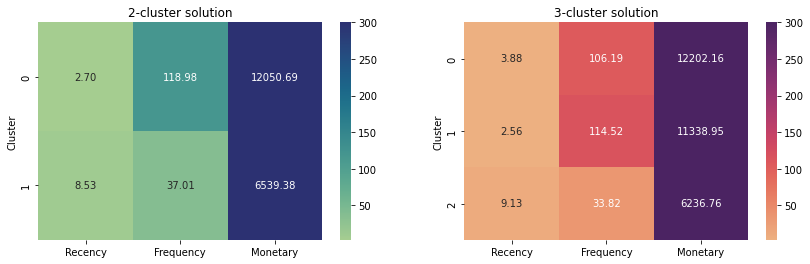

In [16]:
# run K-means with 3 clusters on preprocessed data
kmeans = KMeans(n_clusters = 3, random_state = 1)
kmeans.fit(rfmt_norm)

# extract cluster labels
cluster_labels_3 = kmeans.labels_

# create a Cluster column in the original dataset
rfmt_data_k3 = rfmt_data.assign(Cluster = cluster_labels_3)

# calculate average RFMT values and sizes for each cluster 
rfmt_data_k3_grouped = rfmt_data_k3.groupby('Cluster').agg({
    'Recency':'mean', 'Frequency':'mean', 'Monetary':'mean'})

# plot both solutions
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14, 4))
sns.heatmap(data = rfmt_data_k2_grouped, annot=True, cmap='crest', fmt='.2f', vmin=3, vmax=300, ax=ax1)
sns.heatmap(data = rfmt_data_k3_grouped, annot=True, cmap='flare', fmt='.2f', vmin=3, vmax=300, ax=ax2)
ax1.set_title('2-cluster solution')
ax2.set_title('3-cluster solution')
ax1.set_xlabel('')
ax2.set_xlabel('')
plt.show()

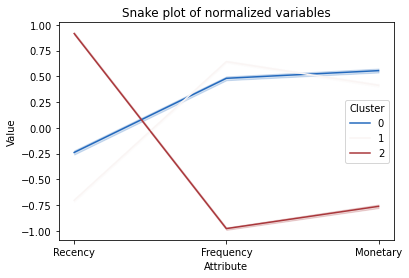

In [17]:
# visualize RFMT values between segments using snake plot
# first, add Cluster coulumn to rfmt_norm
rfmt_norm['Cluster'] = rfmt_data_k3['Cluster']

# melt rfmt_norm into the long format
rfmt_melt = pd.melt(rfmt_norm.reset_index(), id_vars = ['Id_client', 'Cluster'], 
                    value_vars = ['Recency', 'Frequency', 'Monetary'], 
                   var_name = 'Attribute', value_name = 'Value')

# create a snake plot
sns.lineplot(data = rfmt_melt, x = 'Attribute', y = 'Value', 
             hue = 'Cluster', palette = 'vlag')
plt.title('Snake plot of normalized variables')
plt.show()

Получили три кластера: 
    0 - пользователи, кототрые совершали какое либо действие относительно недавно, достаточно часто совершают покупки и приносят компании наибольную прибыль; 
    1 - пользователи, которые совершали какое либо действие совсем недавно, чаще всех совершают покупки и приносят большую прибыль компании; 
    2 - пользователи, которые совершали какое либо действие достаточно давно, не так что совершают покупки и почти не приносят прибыли компании.
    
Кстати, видно, что кластеры 0 и 1 очень похожи. Именно поэтому метод Elbow определил именно 2 кластера, как опттимальное число.
Но решение по количеству кластеров всегда за бизнесом, поэтому иногда можно немного отойти от правил. 
    

In [89]:
rfmt_data_k3

,Id_client,Recency,Frequency,Monetary,Cluster
0,5743,3,119,12399,0
1,5756,2,130,12960,0
2,5781,8,29,2964,0
3,5801,1,404,19676,0
4,5808,8,25,2482,0
...,...,...,...,...,...
27503,822495,6,31,6165,2
27504,822844,8,21,3654,2
27505,823011,7,25,7509,2
27506,823218,8,33,8612,2
